In [42]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20251015_0534.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index
0,0,11.011961,11.038708,NaN,0.000000,1630.168479,0.000000e+00,0
1,10,11.015949,NaN,NaN,1.590009,49633.614705,1.000000e-07,0
2,20,11.026457,NaN,NaN,1.554375,50271.901024,2.000000e-07,0
3,30,10.935169,NaN,NaN,1.610019,50312.129940,3.000000e-07,0
4,40,10.948084,NaN,NaN,1.508594,50228.138304,4.000000e-07,0
...,...,...,...,...,...,...,...,...
14751,147510,3.587989,NaN,NaN,0.303559,49841.109754,1.049902e-05,24
14752,147520,3.690222,NaN,NaN,0.283886,49955.530179,1.049616e-05,24
14753,147530,3.742775,NaN,NaN,0.279696,49792.500734,1.049329e-05,24
14754,147540,3.557128,NaN,NaN,0.286022,49912.243799,1.049043e-05,24


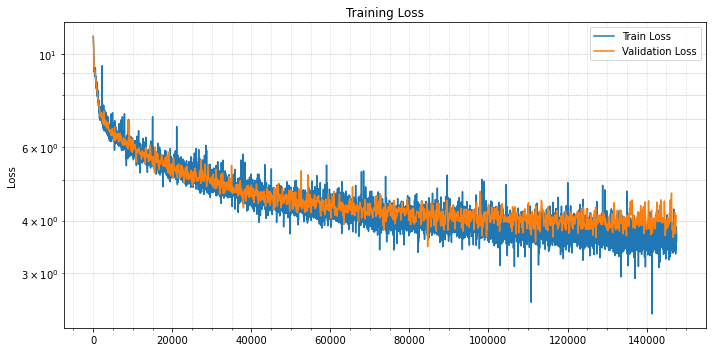

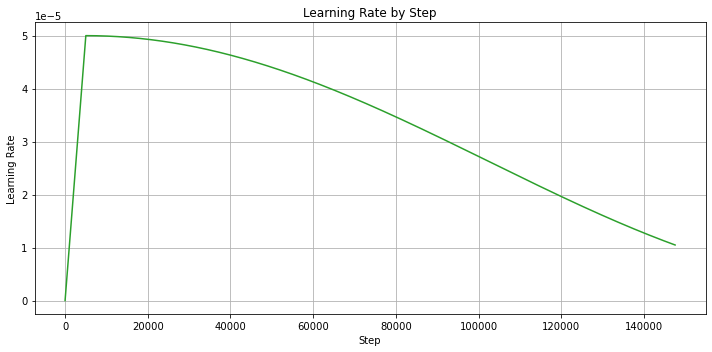

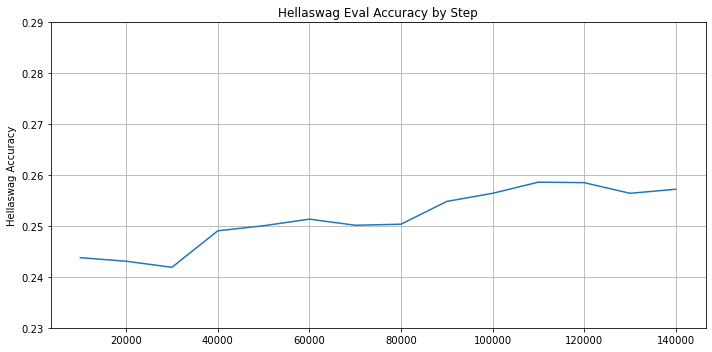

In [43]:
# Training Loss Figure
fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"], df_metrics["train_loss"], color="tab:blue", label="Train Loss"
)
ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
)
ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Training Loss")
ax1.grid(True)
fig1.patch.set_facecolor("white")
plt.tight_layout()
plt.show()

# Learning Rate Figure
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.set_title("Learning Rate by Step")
ax2.grid(True)
plt.tight_layout()
plt.show()

# Hellaswag Eval Accuracy Figure
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.plot(
    df_metrics["step"][df_metrics["hellaswag_acc"].notna()],
    df_metrics["hellaswag_acc"][df_metrics["hellaswag_acc"].notna()],
    color="tab:blue",
)
ax3.set_ylabel("Hellaswag Accuracy")
ax3.set_title("Hellaswag Eval Accuracy by Step")
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.29)
plt.tight_layout()
plt.show()

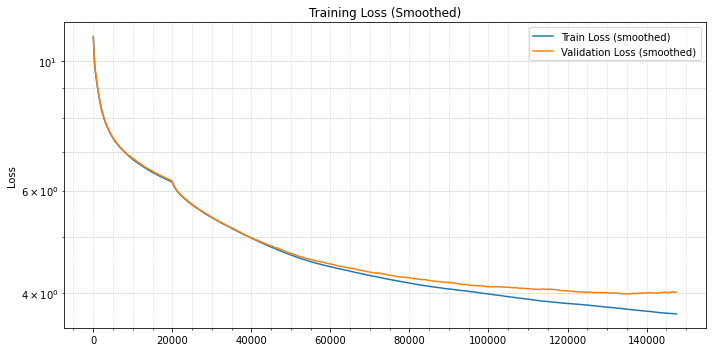

In [44]:
window = 2000
train_loss_smooth = (
    df_metrics["train_loss"].rolling(window=window, min_periods=1).mean()
)
val_loss_smooth = df_metrics["val_loss"].rolling(window=window, min_periods=1).mean()

fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"],
    train_loss_smooth,
    color="tab:blue",
    label="Train Loss (smoothed)",
)
ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    val_loss_smooth[df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss (smoothed)",
    zorder=4,
)
ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Training Loss (Smoothed)")
ax1.grid(True)
fig1.patch.set_facecolor("white")
plt.tight_layout()
plt.show()

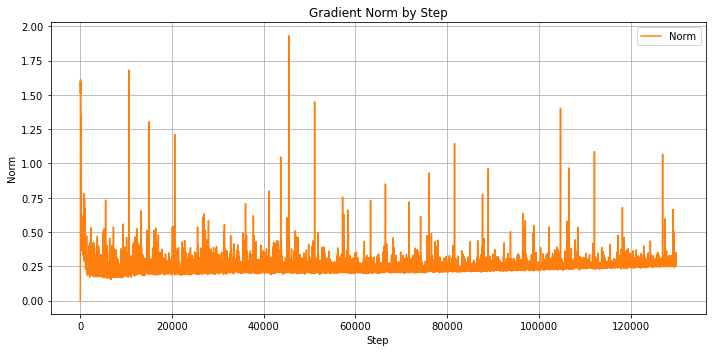

In [3]:
# Plot Norm
fig_norm, ax_norm = plt.subplots(figsize=(10, 5))
ax_norm.plot(df_metrics["step"], df_metrics["norm"], color="tab:orange", label="Norm")
ax_norm.set_xlabel("Step")
ax_norm.set_ylabel("Norm")
ax_norm.set_title("Gradient Norm by Step")
ax_norm.grid(True)
ax_norm.legend()
plt.tight_layout()
plt.show()